In [ ]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error
)


Carregando e lendo os dados pre-tratados de treino, validação e testes


In [ ]:
train_df = pd.read_csv('/content/train_Sleep_health_and_lifestyle_dataset.csv')
val_df   = pd.read_csv('/content/val_Sleep_health_and_lifestyle_dataset.csv')
test_df  = pd.read_csv('/content/test_Sleep_health_and_lifestyle_dataset.csv')

Separando a variável que quero prever das colunas que utilizarei para prever


In [ ]:
target = 'Quality of Sleep'

X_train = train_df.drop(columns=[target])
y_train = train_df[target]

X_val = val_df.drop(columns=[target])
y_val = val_df[target]

X_test = test_df.drop(columns=[target])
y_test = test_df[target]


Definindo a estrutura da nossa árvore definindo os limites e as bases no quesito profundidade, folha e estados. Ele é um modelo que trabalha no (e se) onde a resposta implica diretamente no nosso erro padrão implicando diretamente no resultado.



In [ ]:
tree_model = DecisionTreeRegressor(
    criterion='squared_error',#MSE
    max_depth=6, #Quantas perguntas ao máximo o modelo pode fazer
    min_samples_split=10,#Número maximo de pessoas em que podemos dividir se grupo>10 divide
    min_samples_leaf=5, #regra de tamanho mínimo por folha
    random_state=42 #Nossa variável de aleatóriedade, fixei em 42 pq foi o que resultou nos melhores resultados
)

OBTIVE OS MELHORES RESULTADOS EM COM OS VALORES UTILIZADOS ACIMA.

In [ ]:
#Treinando o modelo utilizando nossa base de dados pre-tratados
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=5, min_samples_split=10,
                      random_state=42)

Em seguida o modelo tenta adivinhar a qualidade do sono dos dados de validação e calculamos o quanto ele errou:

In [ ]:
y_val_pred = tree_model.predict(X_val)

r2_val = r2_score(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)

print("VALIDAÇÃO")
print(f"R²   = {r2_val:.4f}")
print(f"MAE  = {mae_val:.4f}")
print(f"RMSE = {rmse_val:.4f}")
print(f"MSE  = {mse_val:.5f}")


VALIDAÇÃO
R²   = 0.9852
MAE  = 0.0324
RMSE = 0.1489
MSE  = 0.02216


Repetindo o processo de predição utilizando as variáveis de teste

In [ ]:
y_test_pred = tree_model.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("\nTESTE")
print(f"R²   = {r2_test:.4f}")
print(f"MAE  = {mae_test:.4f}")
print(f"RMSE = {rmse_test:.4f}")
print(f"MSE  = {mse_test:.5f}")



TESTE
R²   = 0.9821
MAE  = 0.0420
RMSE = 0.1599
MSE  = 0.02558


Comparando os resultados os valores reais com os de previsão para ajudar a visualizar os erros

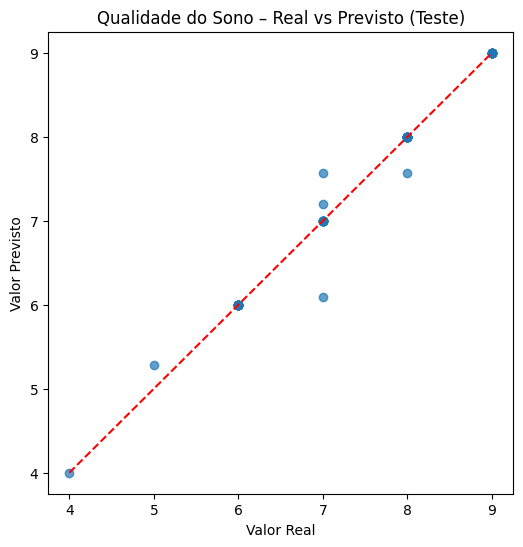

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Valor Real")
plt.ylabel("Valor Previsto")
plt.title("Qualidade do Sono – Real vs Previsto (Teste)")
plt.show()


In [ ]:
importances = pd.Series(
    tree_model.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

importances.head(10)

#NÃO ACHEI A SEPARAÇÃO JUSTA FEITA PELA ÁRVORE, Ela Simplismente superfaturou o Sleep duration
#Sei que acaba sendo sendo um pouco preguiçosa pois na minha análise de fato o que implica mais é a duração
#Mas para mim o estresse implica mais que ser doutor.

,0
Sleep Duration,0.927044
BMI Category,0.040715
Occupation_Doctor,0.015481
Stress Level,0.008362
Daily Steps,0.004941
Heart Rate,0.002321
Physical Activity Level,0.000950
Gender_Female,0.000146
Age,0.000040
BP_Category,0.000000


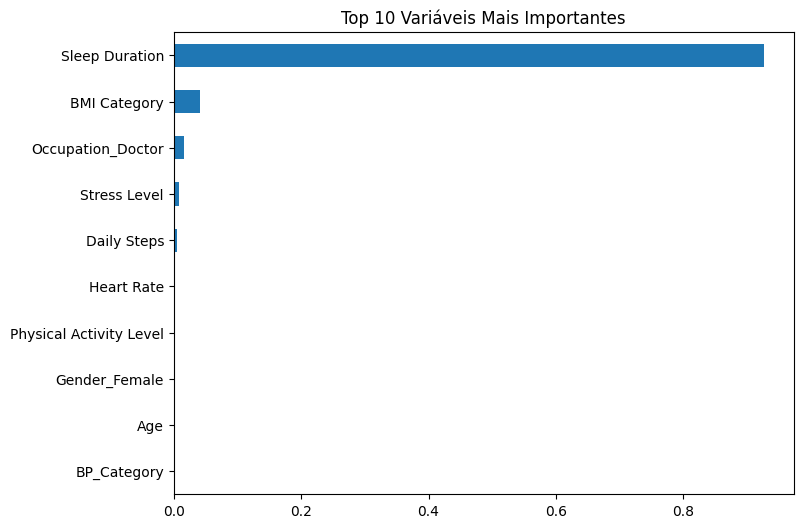

In [ ]:
plt.figure(figsize=(8,6))
importances.head(10).plot(kind='barh')
plt.title("Top 10 Variáveis Mais Importantes")
plt.gca().invert_yaxis()
plt.show()

Como minha árvore está trabalhando, obs: valores estão baseados no desvio padrão da média.

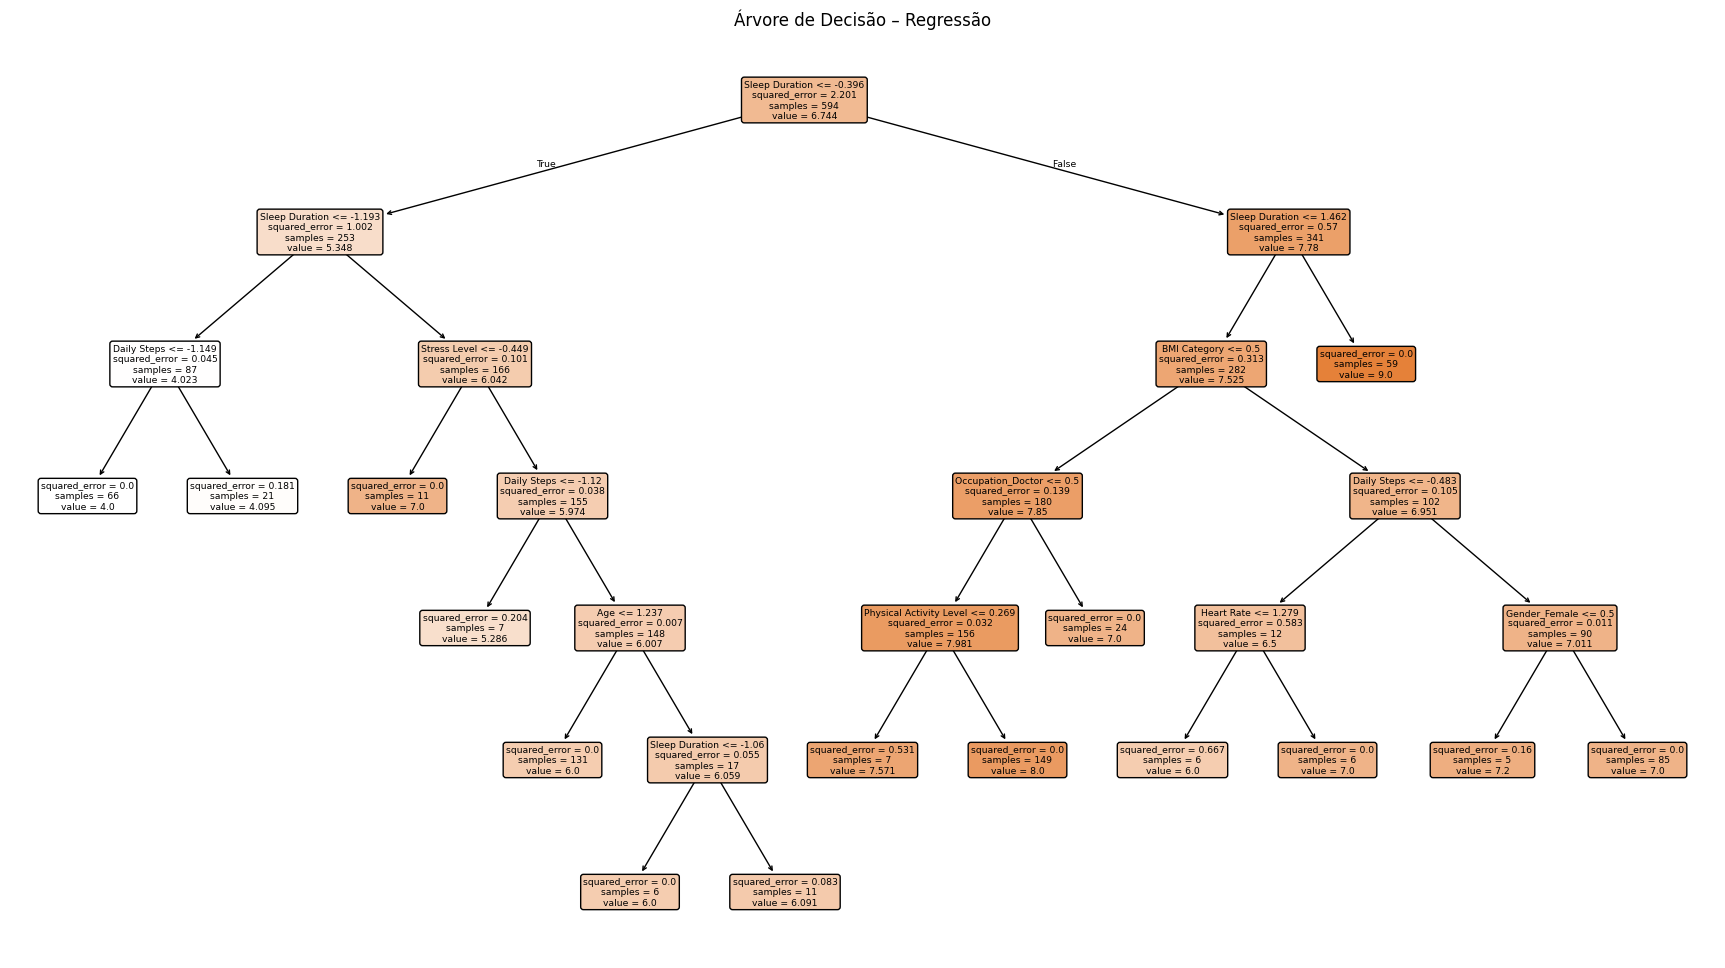

In [ ]:
plt.figure(figsize=(22,12))
plot_tree(
    tree_model,
    feature_names=X_train.columns,
    filled=True,
    rounded=True
)
plt.title("Árvore de Decisão – Regressão")
plt.show()


In [ ]:
joblib.dump(tree_model, 'Modelo_Arvore_de_Decisao.joblib')
joblib.dump(X_train.columns, 'Colunas_Arvore_de_Decisaos.joblib')

['Colunas_Arvore_de_Decisaos.joblib']

Considerações: ELE É UM MODELO PREGUIÇOSO. Eu tenha utilizado o modelo regressivo acaba que o propio modelo induz a discretização do resultado. Achei fácil de entender a sintaxe do modelo uma vez que a visualização da árvore facilita a leitura.